 - Customer ID
  - gender: Whether the customer is a male or a female
  - SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
  - Partner: Whether the customer has a partner or not (Yes, No)
  - Dependents: Whether the customer has dependents or not (Yes, No)
  - tenure: Number of months the customer has stayed with the company
  - PhoneService: Whether the customer has a phone service or not (Yes, No)
  - MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
  - InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
  - OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
  - Churn: our target variable

Customer Churn Analysis

Importing pyhton libraries

In [1]:
import pandas as pd
import numpy as np
import os, math
from collections import Counter

# Plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
morancolor=sns.color_palette(['#66260b', '#cb8034', '#ddc08d', '#9c886f', '#47261a','#363634', '#524636', '#ac7330', '#b19a78', '#d1c5ab'])
sns.set_theme(style="whitegrid", palette=morancolor)
plt.rcParams['font.family']='serif'
plt.rcParams['figure.dpi'] =100 # high resolution

# Manage warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.sample(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
393,9967-ATRFS,Female,0,No,No,19,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.90,367.55,No
3368,1370-GGAWX,Female,0,No,No,46,Yes,Yes,Fiber optic,No,...,Yes,No,No,Yes,One year,Yes,Electronic check,94.15,4408.45,No
6193,5716-LIBJC,Female,0,No,Yes,13,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),104.15,1299.1,No


In [7]:
df.shape

(7043, 21)

Our dataset includes 7042 observations and 21 features
Our target feature is Churn, indicating whether or not a customer has left within the last month
There are only 3 numerical features: SeniorCitizen, TotalCharges and tenure (SeniorCitizen is actually a categorical feature with 2 values, 0 and 1). We also notice that TotalCharges may contains some inconsistent values (like strings) due to its datatype (object)
Looks like we do not have missing data


In [8]:
# data completeness
df.isnull().sum().sort_values(ascending=False)

customerID          0
DeviceProtection    0
TotalCharges        0
MonthlyCharges      0
PaymentMethod       0
PaperlessBilling    0
Contract            0
StreamingMovies     0
StreamingTV         0
TechSupport         0
OnlineBackup        0
gender              0
OnlineSecurity      0
InternetService     0
MultipleLines       0
PhoneService        0
tenure              0
Dependents          0
Partner             0
SeniorCitizen       0
Churn               0
dtype: int64

Data Distribution

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


It seems like there are no extremely difference on our numerical data

In [10]:
df.describe(include='O')


,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,6253-WRFHY,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


But when looking at the distribution of categorical features, we find that the mode value for TotalCharges is " " (a blank space), so we will treat these values as missing data

In [11]:
df.TotalCharges=df.TotalCharges.replace(' ',0).astype('float32')
df.Churn=df.Churn.map({'Yes':1,'No':0}).astype('int')

# Exploratory Data Analysis

 Defining functions

In [12]:
def despine():
    sns.despine(top=1,bottom=1,right=1,left=1)
    
def title(title,fontsize=13):
    plt.title(title,fontweight='bold',fontsize=fontsize)

In [13]:
from scipy.stats import skew
def kdeall(df,lst,target,h=4,w=15,cut=3,showmeans=False,hspace=.5,wspace=.25,showskew=True):
    f=plt.figure(figsize=(w,h))
    plt.subplots_adjust(hspace=hspace,wspace=wspace)
    for i,col in enumerate(lst):
        f.add_subplot(math.ceil(len(lst)/cut),cut,i+1)
        sns.kdeplot(df.dropna(subset=[col,target])[col],cut=0,multiple='stack',alpha=.2)
        sns.kdeplot(df.dropna(subset=[col,target])[col],hue=df[target],cut=0)
        sns.rugplot(df.dropna(subset=[col,target])[col],hue=df.Churn)
        despine()
        plt.ylabel('')
        plt.xlabel(col,fontweight='bold')

In [14]:
def barall(df,lst,target,h=4,w=15,cut=3,hspace=.5,wspace=.25,rotatelst=[],rotation=20,xticksize=10,titlesize=11,yticksize=10):
    f=plt.figure(figsize=(w,h))
    plt.subplots_adjust(hspace=hspace,wspace=wspace)
    for i,col in enumerate(lst):
        f.add_subplot(math.ceil(len(lst)/cut),cut,i+1)
        sns.barplot(data=df,x=col,y=target)
        if col in rotatelst: plt.xticks(rotation=rotation)
        plt.xticks(fontsize=xticksize)
        plt.yticks(fontsize=yticksize)
        plt.xlabel('')
        plt.title(col,fontweight='bold',fontsize=titlesize)
        plt.ylabel('')
        despine()

In [15]:
def boxall(df,lst,h=4,w=10,cut=3,hspace=.5,wspace=.25,showmeans=True):
    f=plt.figure(figsize=(w,h))
    plt.subplots_adjust(hspace=hspace,wspace=wspace)
    for i,col in enumerate(lst):
        f.add_subplot(math.ceil(len(lst)/cut),cut,i+1)
        sns.boxplot(df[col], showmeans=showmeans)
        plt.xlabel(col,fontweight='bold')
        plt.ylabel('')
        despine()

 Univariate analysis

 Our target variable: Churn

In [16]:
df.Churn.value_counts(1)

0    0.73463
1    0.26537
Name: Churn, dtype: float64

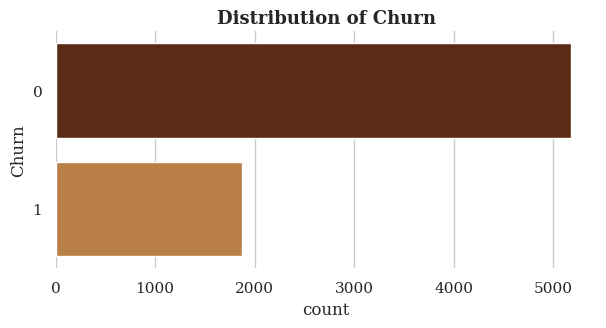

In [17]:
sns.catplot(data=df,y='Churn',kind='count',height=3,aspect=2)
title('Distribution of Churn')
despine()

Our target variable is not really well-balanced with about 73% of customers leaving

 Numerical features

In [18]:
numcol=df.select_dtypes('number').drop(['SeniorCitizen','Churn'],axis=1).columns.tolist()
numcol

['tenure', 'MonthlyCharges', 'TotalCharges']

In [ ]:
kdeall(df,numcol,'Churn',h=6,cut=2,w=10,hspace=.3)
plt.suptitle('Distribution for our numerical features',fontweight='bold')
plt.show()

From the kdeplot, we see that:

New customers are more likely to churn
Customers having higher monthly charges are more likely to churn, monthly charges show a significant different trend between churning and non-churning customers
For total charges, we haven't seen any clear trend
Tenure and monthly charges could be important features in our model

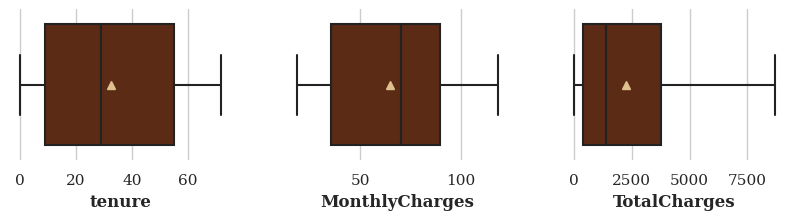

In [21]:
boxall(df,numcol,h=2)

Our numerical features do not contain outliers, so no need processing

Categorical features

In [23]:
df.select_dtypes("O").nunique().sort_values(ascending=False)

customerID          7043
PaymentMethod          4
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
gender                 2
Partner                2
Dependents             2
PhoneService           2
PaperlessBilling       2
dtype: int64

5 binary features.
10 features with 3-4 unique values.
We don't concern about customerID becase it acts as an index

In [24]:
catcol=df.select_dtypes("O").nunique().sort_values(ascending=False)[1:].index.tolist()
print(f"We have {len(catcol)} categorical features")

We have 15 categorical features


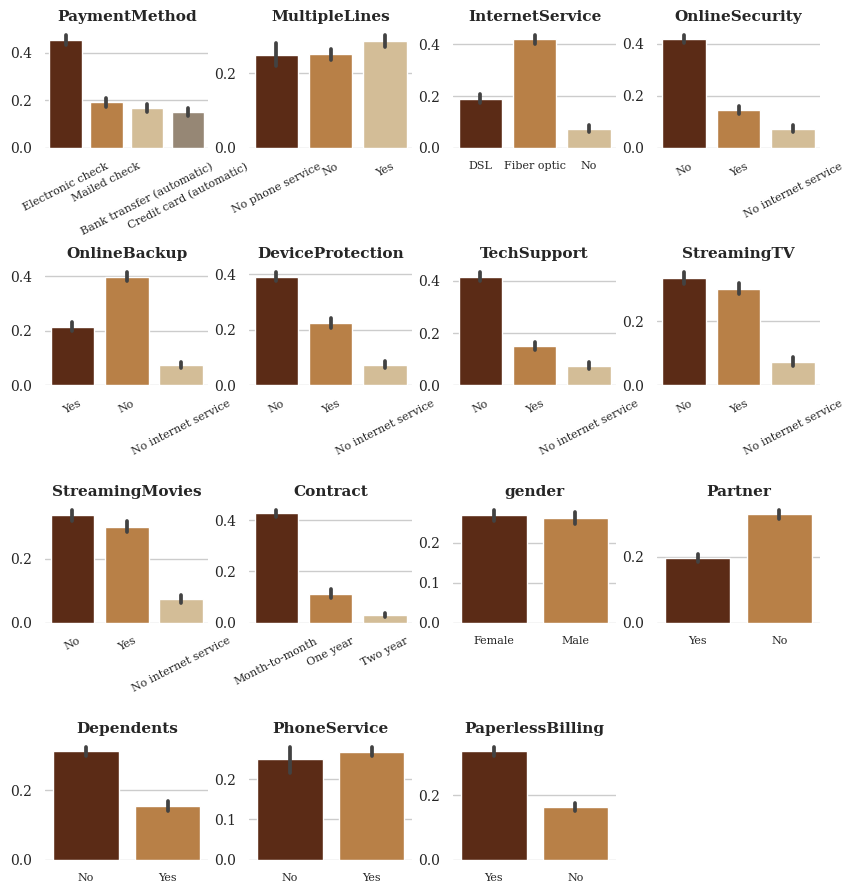

In [25]:
barall(df,catcol,'Churn',w=10,h=11,cut=4,
       rotatelst=['PaymentMethod','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
                 'Contract','StreamingTV','StreamingMovies'],
       xticksize=8,rotation=27,hspace=1)

Feature not showing a clear difference between churning and non-churning customers: gender
Feature showing a slightly difference between groups: MultipleLines and PhoneService
We also notice that customers without internet service have the lowest churn rate

Partner and Dependents: customers without a partner are more likely to churn and customers without dependents are also more likely to churn
Contract, PaymentMethod and PaperlessBilling: customers with long-term contracts have lower churn rates, customers with paperless billing are more likely to churn, customers using electronic check as a payment method have a higher churn rate
Additional services: There are 6 additional services, including: OnlineSecurity, OnelineBackup, DeviceProtection, TechSupport, StreamingTV, and StreamingMovies. It can be seen that customers not using these additional services are more likely to churn, except for streaming services that do not show a clear difference
MultipleLines and PhoneService: Customers having multiple lines, customers using phone services have a higher probability of churning

Multivariate analysis

Correlation Matrix

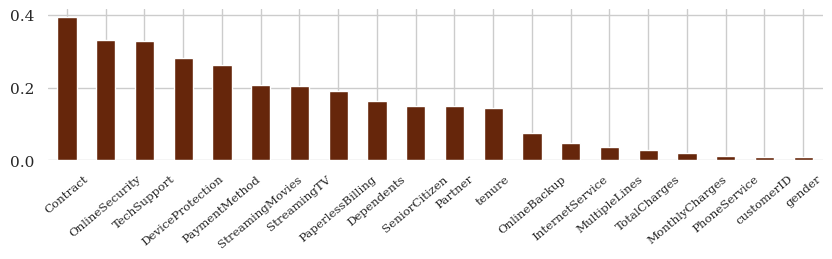

In [26]:
# we use pd.factorize to encode the object as an enumerated type or categorical variable
df.apply(lambda x: pd.factorize(x)[0]).corr().Churn.abs().sort_values(ascending=False)[1:].plot(kind='bar',figsize=(10,2))
plt.xticks(fontsize=8.5, rotation=40)
despine()

The most important features (in order) are: Contract, OnlineSecurity, TechSupport, DeviceProtection and PaymentMethod

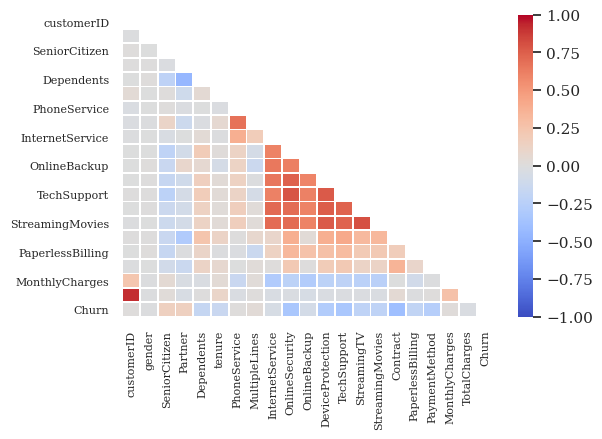

In [27]:
sub=df.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(sub))
sns.heatmap(sub,vmax=1,vmin=-1,cmap='coolwarm',mask=mask,lw=.5)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
despine()

Some features show significant correlation, such as: Dependents and Parner, MonthlyCharges and additional services

Partner and dependents

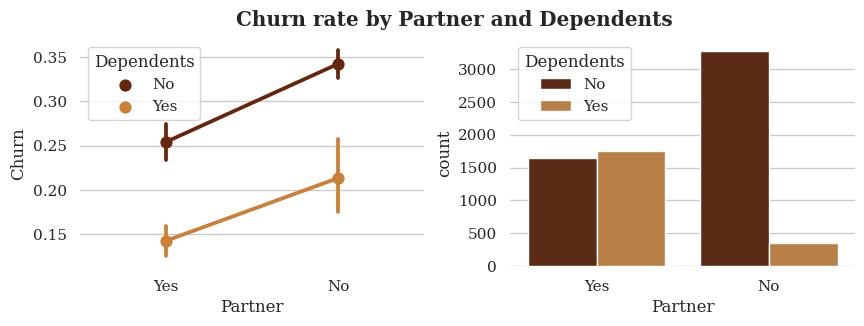

In [28]:
f,ax=plt.subplots(1,2,figsize=(10,3))
plt.subplots_adjust(wspace=.25)
sns.pointplot(data=df,x='Partner',y='Churn',hue='Dependents',ax=ax[0])
sns.countplot(df.Partner,hue=df.Dependents,ax=ax[1])
plt.suptitle('Churn rate by Partner and Dependents',fontweight='bold')
despine()

In [29]:
sub.corr().Dependents['Partner']

-0.7535767425273988

The correlation coefficient of -0.75 between Dependents and Partner indicates that customers with partner are more likely to have dependents, which makes sense
We've noticed that customers without parner and/or dependents have a higher churn rate

Contract, PaperlessBilling and PaymentMethod

In [30]:
sub.corr().Contract[['PaperlessBilling','PaymentMethod']]

PaperlessBilling    0.435821
PaymentMethod       0.656744
Name: Contract, dtype: float64

In [31]:
sub.corr().PaperlessBilling['PaymentMethod']

0.2727596542575026

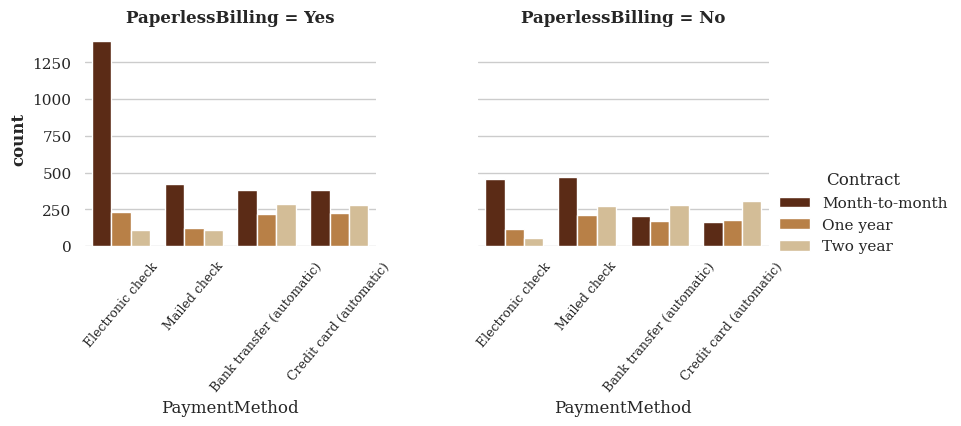

In [32]:
g=sns.catplot(data=df,x="PaymentMethod",col="PaperlessBilling",hue="Contract",kind='count',height=3,aspect=1.3,
             col_wrap=2)
for ax in g.axes:
    ax.set_xticklabels(ax.get_xticklabels(),rotation=50,fontsize=9)
g.set_titles(fontweight='bold')
g.set_ylabels(fontweight='bold')
despine()

We found that customers with short-term contracts tend to use manual payment methods more, and they are also more likely to use paperless payment methods

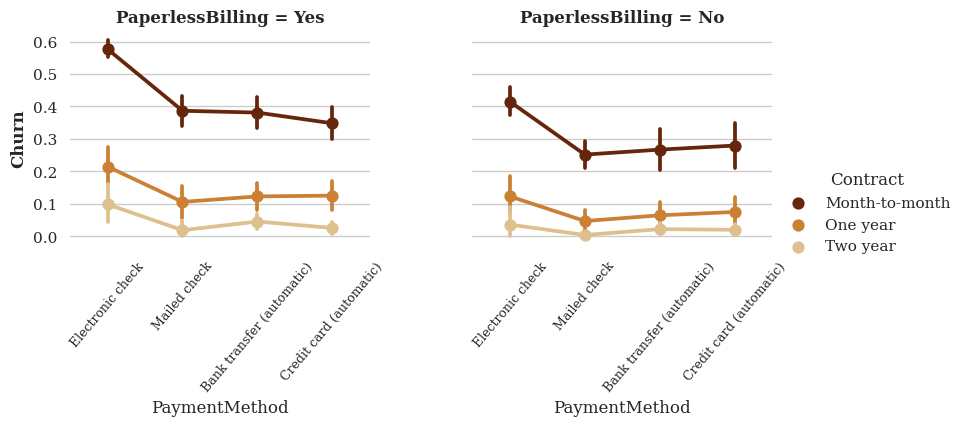

In [33]:
g=sns.catplot(data=df,x="PaymentMethod",y="Churn",col="PaperlessBilling",hue="Contract",kind='point',height=3,aspect=1.3,
             col_wrap=2)
for ax in g.axes:
    ax.set_xticklabels(ax.get_xticklabels(),rotation=50,fontsize=9)
g.set_titles(fontweight='bold')
g.set_ylabels(fontweight='bold')
despine()

 Contract, PaymentMethod and MonthlyCharges

MonthlyCharges and Contract


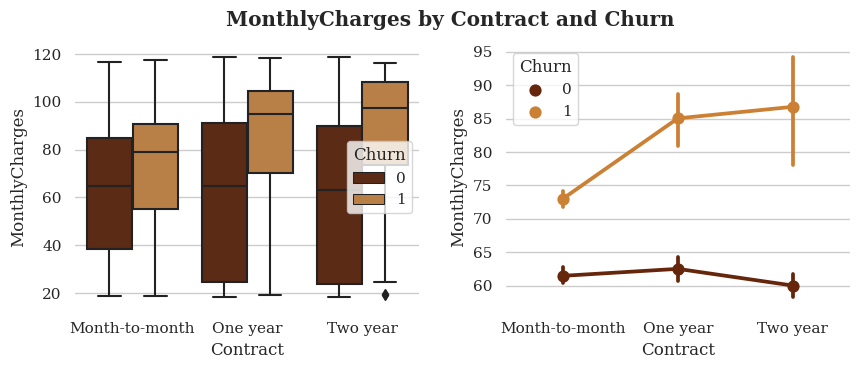

In [34]:
f,ax=plt.subplots(1,2,figsize=(10,3.5))
plt.subplots_adjust(wspace=.25)
sns.boxplot(df.Contract,df.MonthlyCharges,hue=df.Churn,ax=ax[0])
sns.pointplot(df.Contract,df.MonthlyCharges,hue=df.Churn)
plt.suptitle('MonthlyCharges by Contract and Churn',fontweight='bold')
despine()

In general, long-term contracts have higher MonthlyCharges
Customers leaving pay higher MonthlyCharges

MonthlyCharges and PaymentMethod

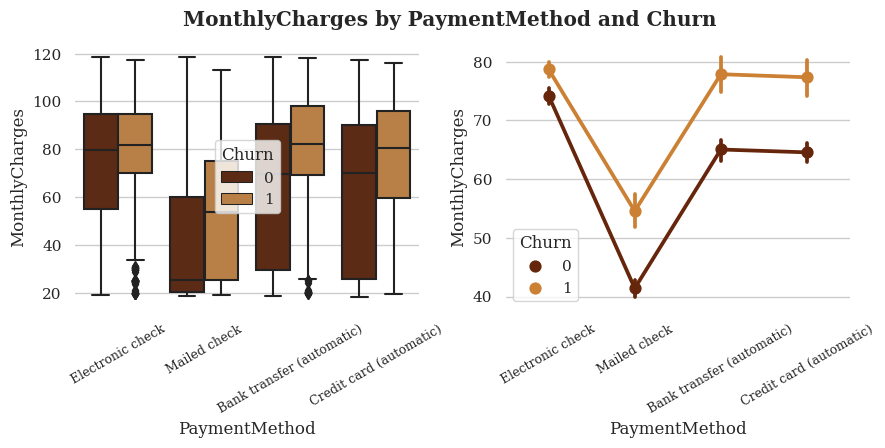

In [35]:
f,ax=plt.subplots(1,2,figsize=(10,3.5))
plt.subplots_adjust(wspace=.25)
sns.boxplot(df.PaymentMethod,df.MonthlyCharges,hue=df.Churn,ax=ax[0])
sns.pointplot(df.PaymentMethod,df.MonthlyCharges,hue=df.Churn)
plt.suptitle('MonthlyCharges by PaymentMethod and Churn',fontweight='bold')
for i in [0,1]:
    ax[i].tick_params(axis='x', rotation=30, labelsize=9)
despine()

Mailed check payment method has the lowest MonthlyCharges, and it also has lowest churn rates
There is a huge gap between churning and non-churning customers using mailed check as a payment method

Data Preprocessing

Categorical features encoding

In [36]:
sub=df.select_dtypes(include='O').nunique()
sub=sub[sub==2].index.tolist()
sub # features with 2 unique values

['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

In [37]:
sub=[i for i in sub if set(df[i].unique())=={'Yes','No'}]
sub # features with values: No - Yes

['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

In [38]:
for i in sub:
    df[i]=df[i].map({'Yes':1,'No':0}).astype('int')

In [39]:
df.gender=df.gender.map({'Female':0,'Male':1})
df=df.drop('customerID',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   object 


In [40]:
df=pd.get_dummies(df)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int64  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int32  
 3   Dependents                               7043 non-null   int32  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int32  
 6   PaperlessBilling                         7043 non-null   int32  
 7   MonthlyCharges                           7043 non-null   float64
 8   TotalCharges                             7043 non-null   float32
 9   Churn                                    7043 non-null   int32  
 10  MultipleLines_No                         7043 no

Calculate feature importances

In [42]:
X,y=df.drop('Churn',axis=1),df.Churn
X.shape,y.shape

((7043, 40), (7043,))

In [43]:
from sklearn.ensemble import RandomForestClassifier
params={'random_state':42, 'n_estimators':500}
clf=RandomForestClassifier(**params)
clf.fit(X,y)

RandomForestClassifier(n_estimators=500, random_state=42)

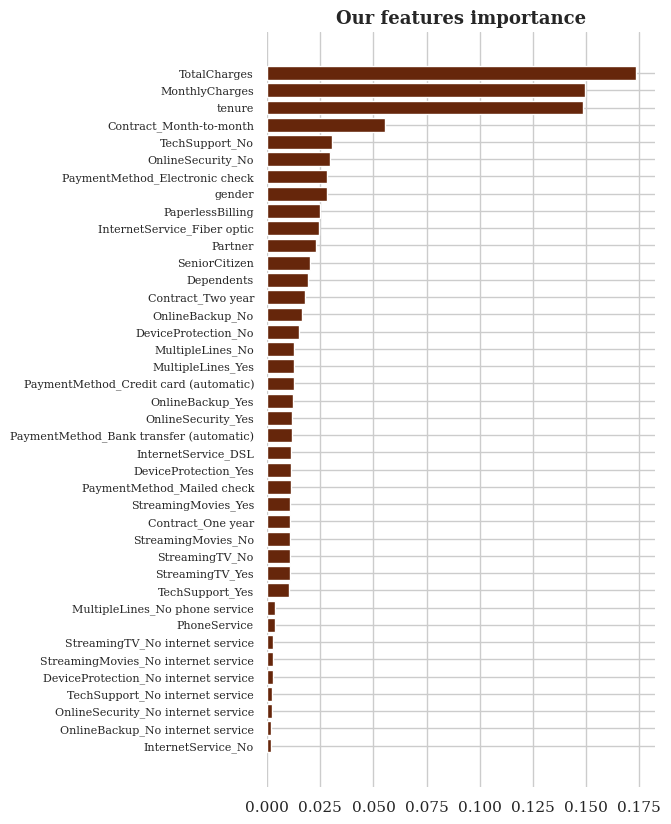

In [44]:
sub=pd.Series(data=clf.feature_importances_,index=X.columns).sort_values()
plt.figure(figsize=(5,10))
plt.barh(sub.index,sub.values)
plt.yticks(fontsize=8)
title('Our features importance')
despine()

3 most importance features (in order) are: TotalCharges, MonthlyCharges, and tenure

Features Scaling

Let's see our continuous features' distribution again

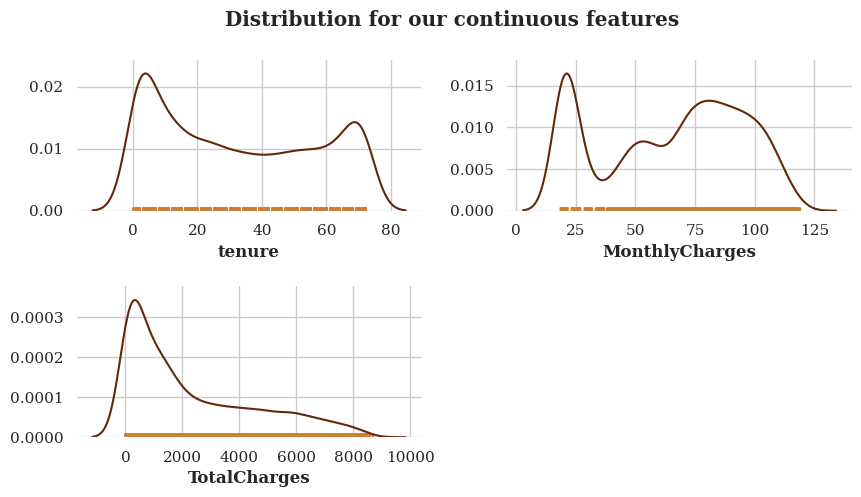

In [45]:
f=plt.figure(figsize=(10,5))
plt.subplots_adjust(hspace=.5,wspace=.25)
for i,col in enumerate(numcol):
    f.add_subplot(math.ceil(len(numcol)/2),2,i+1)
    sns.kdeplot(df[col])
    sns.rugplot(df[col])
    plt.ylabel('')
    plt.xlabel(col,fontweight='bold')
plt.suptitle('Distribution for our continuous features',fontweight='bold')
despine()

Our numerical features are not normally distributed, so we are going to use MinMaxScaler to scale them

In [46]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
for i in numcol:
    df[i]=sc.fit_transform(df[i].values.reshape(-1,1)).reshape(1,-1)[0]

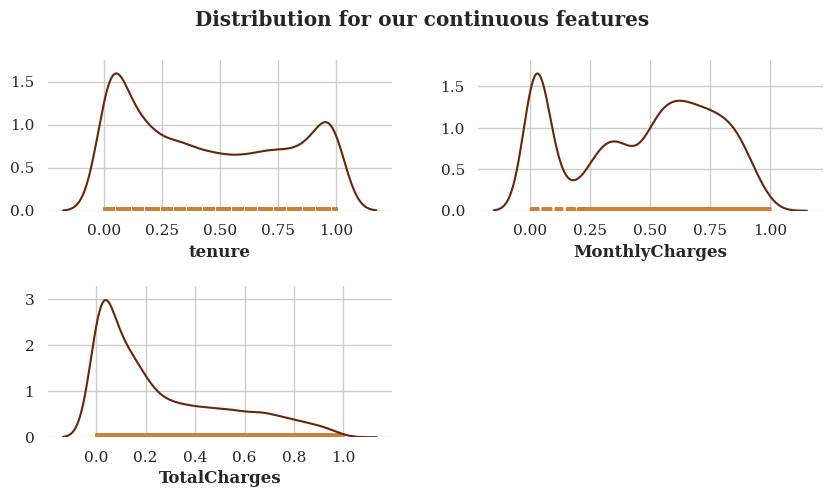

In [47]:
f=plt.figure(figsize=(10,5))
plt.subplots_adjust(hspace=.5,wspace=.25)
for i,col in enumerate(numcol):
    f.add_subplot(math.ceil(len(numcol)/2),2,i+1)
    sns.kdeplot(df[col])
    sns.rugplot(df[col])
    plt.ylabel('')
    plt.xlabel(col,fontweight='bold')
plt.suptitle('Distribution for our continuous features',fontweight='bold')
despine()

Modelling

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

X,y=df.drop(columns='Churn'),df.Churn
Xtrain,Xval,ytrain,yval=train_test_split(X,y,test_size=.25,random_state=42)
Xtrain.shape,Xval.shape

((5282, 40), (1761, 40))

In [49]:
def fit(clf,Xtrain,ytrain,Xval,yval,cmap='RdBu'):
    clf.fit(Xtrain,ytrain)
    ypred=clf.predict(Xval)
    sns.heatmap(confusion_matrix(yval,ypred),annot=True,fmt='.0f',cmap=cmap)
    print(f"train score: {clf.score(Xtrain,ytrain)}")
    print(f"test score: {clf.score(Xval,yval)}\n")
    print(classification_report(yval,ypred))

KNN

train score: 0.8048087845513063
test score: 0.7825099375354913

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1282
           1       0.61      0.57      0.59       479

    accuracy                           0.78      1761
   macro avg       0.72      0.72      0.72      1761
weighted avg       0.78      0.78      0.78      1761



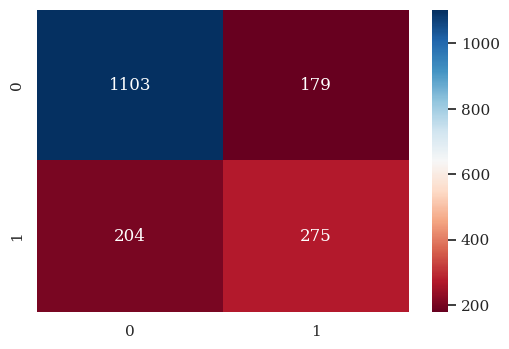

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=21)
fit(knn,Xtrain,ytrain,Xval,yval)

SVC

train score: 0.8135176069670579
test score: 0.80465644520159

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1282
           1       0.69      0.51      0.59       479

    accuracy                           0.80      1761
   macro avg       0.76      0.71      0.73      1761
weighted avg       0.79      0.80      0.79      1761



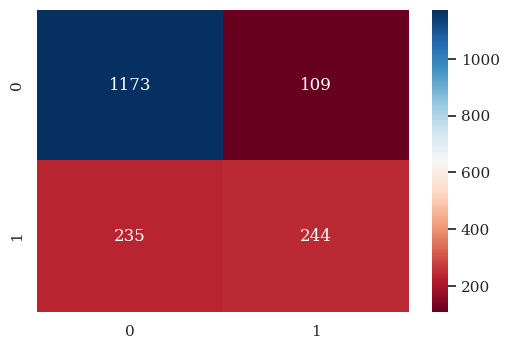

In [51]:
from sklearn.svm import SVC
svc=SVC(random_state=42)
fit(svc,Xtrain,ytrain,Xval,yval)

Random Forest Classifier

train score: 0.998485422188565
test score: 0.7927314026121521

              precision    recall  f1-score   support

           0       0.82      0.91      0.87      1282
           1       0.67      0.47      0.55       479

    accuracy                           0.79      1761
   macro avg       0.75      0.69      0.71      1761
weighted avg       0.78      0.79      0.78      1761



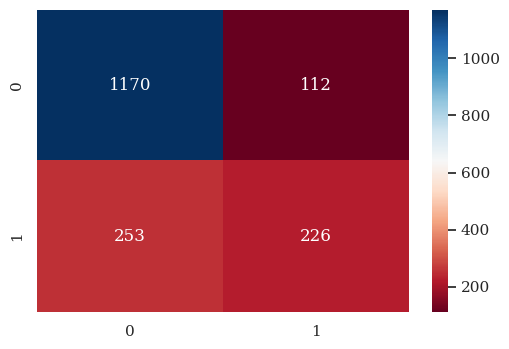

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42, n_estimators=200)
fit(rf,Xtrain,ytrain,Xval,yval)

LGBM Classifier

In [ ]:
from lightgbm import LGBMClassifier
lgbm=LGBMClassifier(learning_rate=.03,n_estimators=400)
fit(lgbm,Xtrain,ytrain,Xval,yval)

XGBClassifier

In [ ]:

from xgboost import XGBClassifier
xgb=XGBClassifier(booster='gblinear', learning_rate=.05, n_estimators=100, random_state=42)
fit(xgb,Xtrain,ytrain,Xval,yval)

CatBoostClassifier


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
cb=CatBoostClassifier(random_state=42, learning_rate=.05, iterations=200)
fit(cb,Xtrain,ytrain,Xval,yval)

GradientBoostingClassifier

train score: 0.8262021961378265
test score: 0.8023850085178875

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1282
           1       0.68      0.52      0.59       479

    accuracy                           0.80      1761
   macro avg       0.76      0.72      0.73      1761
weighted avg       0.79      0.80      0.79      1761



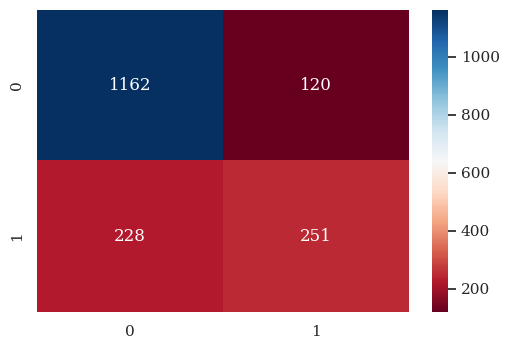

In [59]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(learning_rate=.1, n_estimators=100, random_state=42, loss='deviance')
fit(gbc,Xtrain,ytrain,Xval,yval)